In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
sns.get_dataset_names()
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [4]:
#Columns name and meaning

# survived: Whether the passenger survived (1) or not (0).
# pclass: Passenger's class (1 = 1st, 2 = 2nd, 3 = 3rd).
# sex: Passenger's gender.
# age: Passenger's age.
# sibsp: Number of siblings/spouses aboard.
# parch: Number of parents/children aboard.
# fare: Ticket price.
# embarked: Port of embarkation (C, Q, S).
# class: Ticket class (categorical).
# who: Person's role (man, woman, child).
# adult_male: If the passenger is an adult male.
# deck: Deck of the cabin.
# embark_town: Name of embarkation town.
# alive: Survival status (yes, no).
# alone: If the passenger was alone.

#1.Cleaning the Data

Check for missing values and decide how to handle them (e.g., using imputation or dropping them).

In [5]:
df.survived.isna().sum()   # 0 null values
df.pclass.isna().sum()     # 0 null values
df.sex.isna().sum()        # 0 null values
df.age.isna().sum()        # 177 null values
df['class'].isna().sum()   # O null values
df.embark_town.isna().sum() # 2 null values

2

#2. Demographic Analysis






In [6]:
df.groupby('survived')['age'].describe()    #mean age of survival is 28.3

,count,mean,std,min,25%,50%,75%,max
survived,,,,,,,,
0,424.0,30.626179,14.172110,1.00,21.0,28.0,39.0,74.0
1,290.0,28.343690,14.950952,0.42,19.0,28.0,36.0,80.0


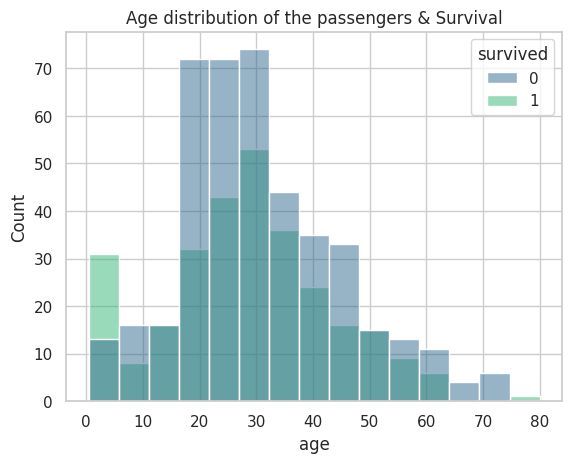

In [7]:
# Age Distribution of Passengers: What is the age distribution of the passengers? How does it vary by survival?

sns.set_theme(style="whitegrid")
sns.histplot(x='age',data=df,bins=15,hue='survived',palette='viridis').set_title('Age distribution of the passengers & Survival')
plt.show()

In [8]:
pd.DataFrame(df.groupby(['pclass','sex'])['survived'].sum()).reset_index()

,pclass,sex,survived
0,1,female,91
1,1,male,45
2,2,female,70
3,2,male,17
4,3,female,72
5,3,male,47


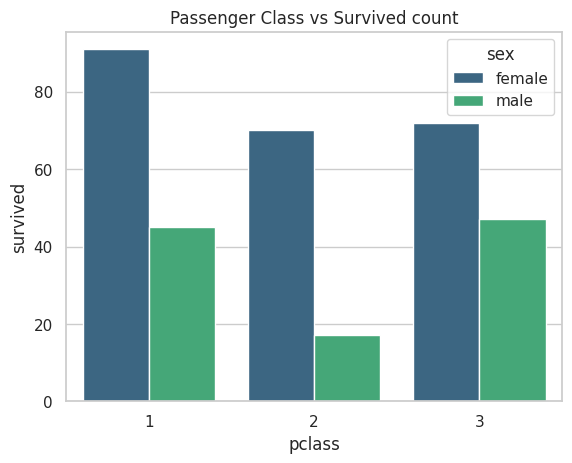

In [9]:
# Survival Rates by Class: How does passenger class (Pclass) affect the survival rate?

data = pd.DataFrame(df.groupby(['pclass','sex'])['survived'].sum()).reset_index()
sns.set_theme(style='whitegrid')
sns.barplot(x='pclass',y='survived',data=data,palette='viridis',hue='sex').set_title('Passenger Class vs Survived count')
plt.show()

#3. Relationship Analysis



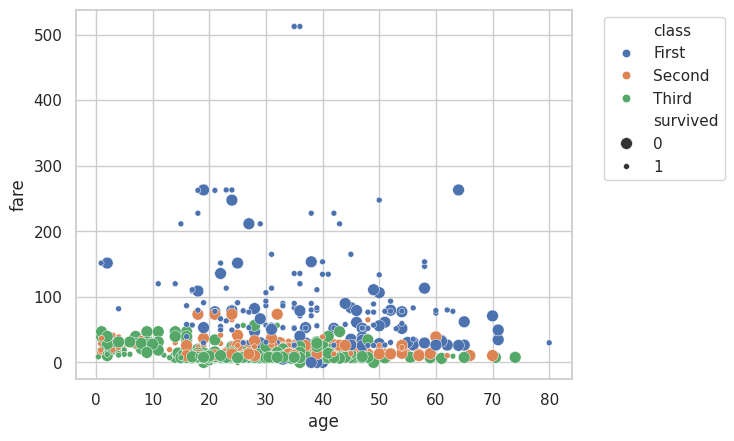

In [10]:
# Age vs. Fare: Is there a relationship between age and fare paid? Does this relationship vary by survival or class?

sns.scatterplot(x=df.age,y=df.fare,marker='o',size=df['survived'],hue=df['class'])
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

#graph shows higher the fare,higher the class -->high chances of survival

In [11]:
# Class and Fare Analysis: Analyze the distribution of fares across different classes. Is there a significant difference in fare distribution among different passenger classes?

pd.DataFrame(df.groupby('class')['fare'].describe()).reset_index()

,class,count,mean,std,min,25%,50%,75%,max
0,First,216.0,84.154687,78.380373,0.0,30.92395,60.2875,93.5,512.3292
1,Second,184.0,20.662183,13.417399,0.0,13.00000,14.2500,26.0,73.5000
2,Third,491.0,13.675550,11.778142,0.0,7.75000,8.0500,15.5,69.5500


<ipython-input-12-8fa1be6919a7>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='class',y='fare',data=df,width=0.5,palette='viridis').set_title('Class vs Fare')


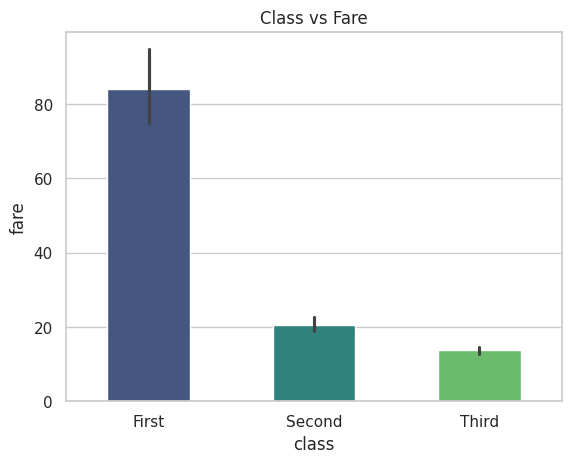

In [12]:
sns.barplot(x='class',y='fare',data=df,width=0.5,palette='viridis').set_title('Class vs Fare')
plt.show()

In [13]:
# Embarkation Point Analysis: Does the point of embarkation affect survival rates? Consider the relationship between
# embarkation points, passenger class, and survival.


df_ = pd.DataFrame(df.groupby(['survived','pclass','embark_town'])['sex'].count()).reset_index().rename(columns={'sex':'People'}).sort_values('People',ascending=False)
#most survived  embark_town =Southampton, count=217, higher from class 1

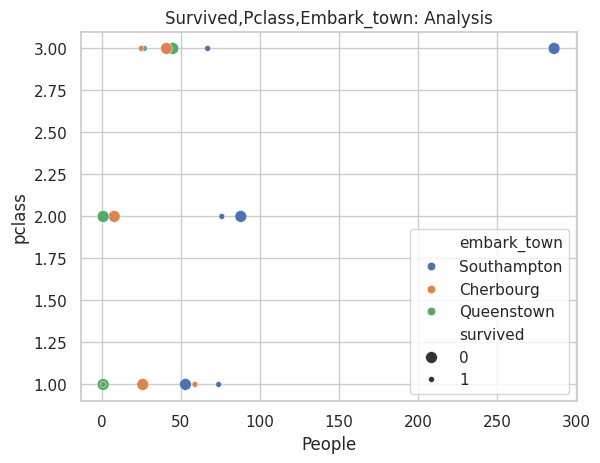

In [14]:
sns.scatterplot(x='People',y='pclass',data=df_,hue='embark_town',marker='o',size='survived').set_title('Survived,Pclass,Embark_town: Analysis')
plt.legend(loc='best')

#3. Advanced Insights

In [15]:
# Family Presence and Survival: Does traveling with family (parents, children, siblings, or spouse) affect the chances of survival?

# sibsp parch

In [16]:
pd.DataFrame(df[(df['sibsp']>=1)].groupby('survived')['sibsp'].count()).reset_index()


,survived,sibsp
0,0,151
1,1,132


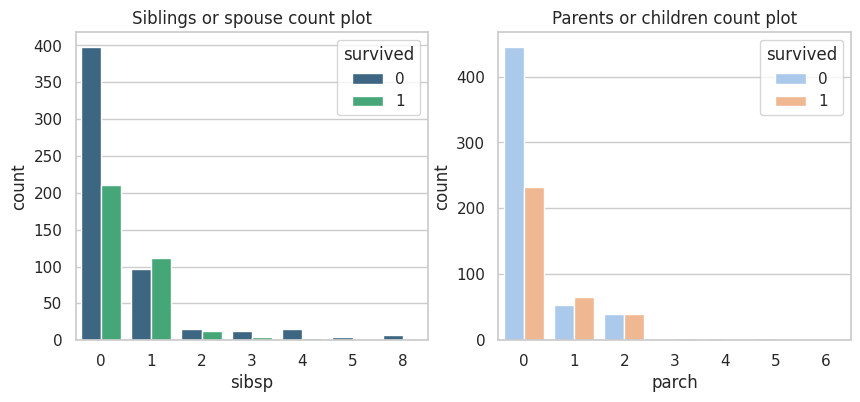

In [17]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.countplot(x=df.sibsp,hue=df.survived,palette='viridis').set_title('Siblings or spouse count plot')
plt.subplot(1,2,2)
sns.countplot(x=df.parch,hue=df.survived,palette='pastel').set_title('Parents or children count plot')
plt.show()


#Nothing much difference in survival if travelling with family

In [58]:
# Cabin Analysis: Is there a pattern in survival rate based on cabin allocation?
pd.DataFrame(df.groupby(['deck'])['survived'].value_counts().reset_index(name='count'))

,deck,survived,count
0,A,0,8
1,A,1,7
2,B,1,35
3,B,0,12
4,C,1,35
5,C,0,24
6,D,1,25
7,D,0,8
8,E,1,24
9,E,0,8


Text(0.5, 1.0, 'Deck count')

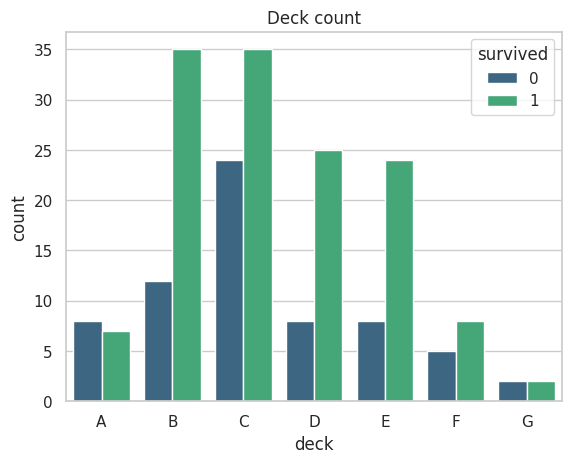

In [59]:
sns.countplot(x=df.deck,hue=df.survived,palette='viridis').set_title('Deck count')

#Deck B and C people survived most